In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [2]:
#to be import
df = pd.read_csv("sorting_results.csv")
df

,Threshold,Array Size,Algorithm,Time (ms),Comparisons,IsSorted
0,1,1000,MergeSort,2,8729,True
1,1,1000,HybridMergeSort,0,8710,True
2,1,2000,MergeSort,1,19403,True
3,1,2000,HybridMergeSort,0,19410,True
4,1,3000,MergeSort,1,30918,True
...,...,...,...,...,...,...
1439,950,5000000,HybridMergeSort,2283,832200336,True
1440,950,7500000,MergeSort,1604,161906556,True
1441,950,7500000,HybridMergeSort,4509,1820460954,True
1442,950,10000000,MergeSort,2254,220099491,True


In [3]:
hybrid_df = df[df['Algorithm'] == 'HybridMergeSort']
hybrid_df

,Threshold,Array Size,Algorithm,Time (ms),Comparisons,IsSorted
1,1,1000,HybridMergeSort,0,8710,True
3,1,2000,HybridMergeSort,0,19410,True
5,1,3000,HybridMergeSort,1,30890,True
7,1,4000,HybridMergeSort,1,42841,True
9,1,5000,HybridMergeSort,2,55287,True
...,...,...,...,...,...,...
1435,950,2000000,HybridMergeSort,749,269661495,True
1437,950,2500000,HybridMergeSort,1129,413392010,True
1439,950,5000000,HybridMergeSort,2283,832200336,True
1441,950,7500000,HybridMergeSort,4509,1820460954,True


In [4]:
merge_df = df[df['Algorithm'] == 'MergeSort']
merge_df

,Threshold,Array Size,Algorithm,Time (ms),Comparisons,IsSorted
0,1,1000,MergeSort,2,8729,True
2,1,2000,MergeSort,1,19403,True
4,1,3000,MergeSort,1,30918,True
6,1,4000,MergeSort,1,42867,True
8,1,5000,MergeSort,2,55335,True
...,...,...,...,...,...,...
1434,950,2000000,MergeSort,424,39348690,True
1436,950,2500000,MergeSort,523,50025596,True
1438,950,5000000,MergeSort,1133,105049720,True
1440,950,7500000,MergeSort,1604,161906556,True


In [15]:
print("Threshold: " , df['Threshold'].unique())
print("Number of Different Threshold: ",df['Threshold'].nunique())
print("Array Size: " , df['Array Size'].unique())
print("Number of Different Array Size: ",df['Array Size'].nunique())

Threshold:  [  1   5   8  10  15  16  20  25  30  32  35  40  45  50  55  60  65  70
  75  80  85  90  95 100 124 200 250 300 350 400 450 500 550 650 750 850
 900 950]
Number of Different Threshold:  38
Array Size:  [    1000     2000     3000     4000     5000    10000    20000    30000
    40000    50000   100000   500000  1000000  1500000  2000000  2500000
  5000000  7500000 10000000]
Number of Different Array Size:  19


## ci. (Fixed threshold) Key comparison vs Array size
With the value of S fixed, plot the number of key comparisons over different sizes of the input list n. Compare your empirical results with your theoretical analysis of the time complexity

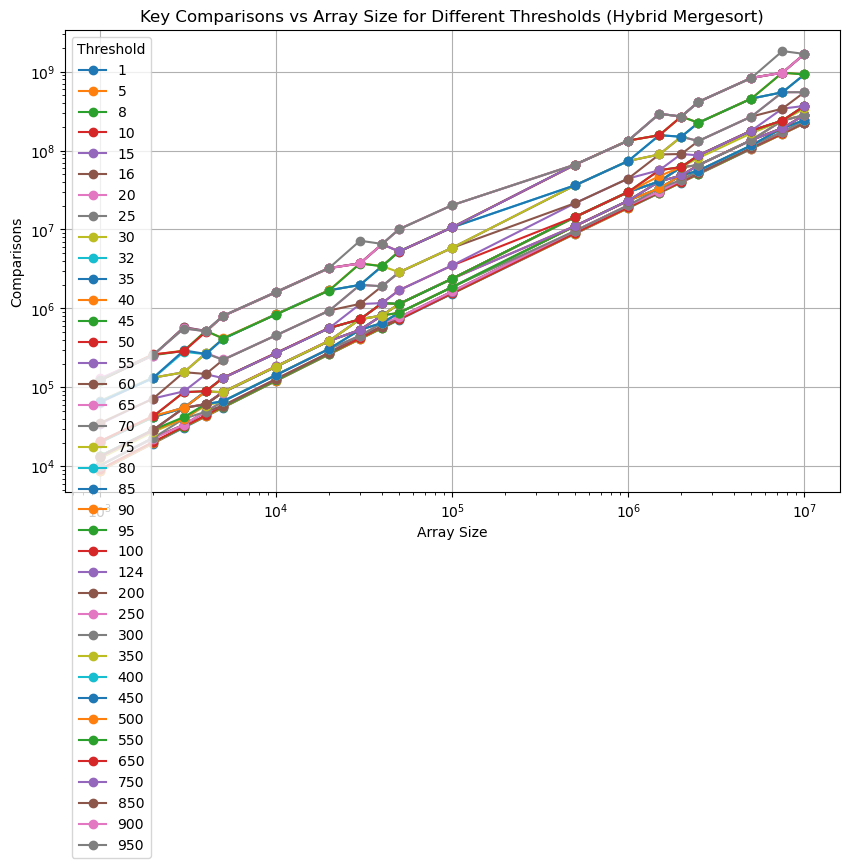

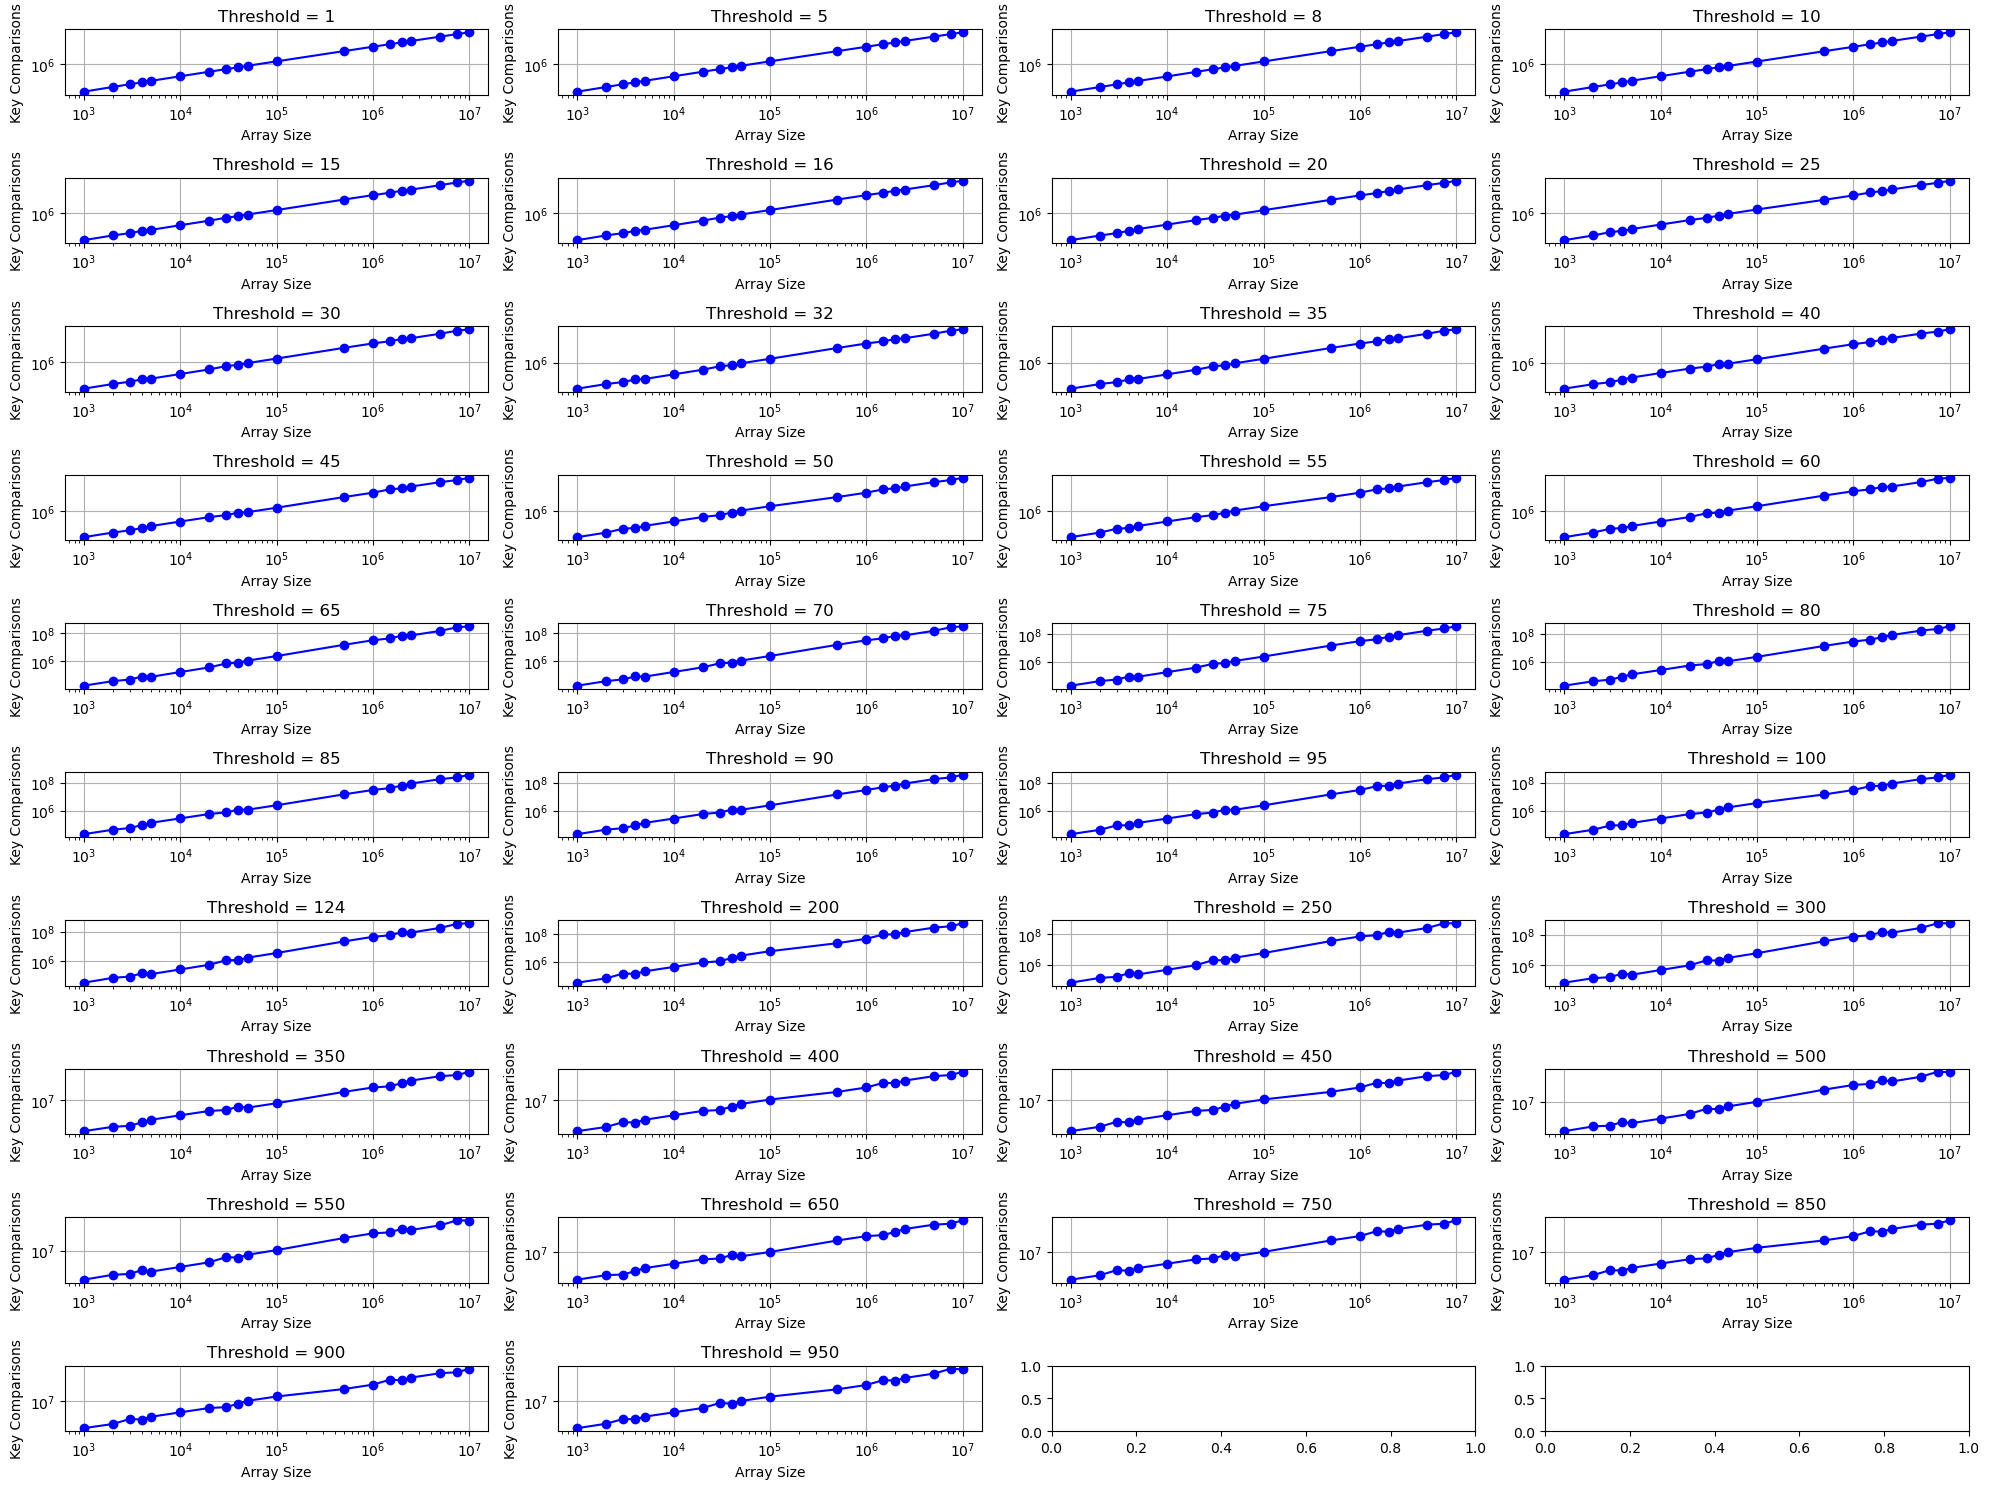

In [13]:
#1. Combined graph
plt.figure(figsize=(10, 6))

# Group the data by threshold and plot each group
for Threshold, group in hybrid_df.groupby('Threshold'):
    plt.plot(group['Array Size'], group['Comparisons'], marker='o', label=f'{Threshold}')

plt.title('Key Comparisons vs Array Size for Different Thresholds (Hybrid Mergesort)')
plt.xlabel('Array Size')
plt.ylabel('Comparisons')
plt.legend(title="Threshold")
plt.grid(True)
plt.xscale('log')  # Logarithmic scale for array size if necessary
plt.yscale('log')  # Logarithmic scale for key comparisons if necessary
plt.show()

#2. Separate graph
fig, axes = plt.subplots(10, 4, figsize=(40, 30)) 
axes = axes.flatten()

unique_thresholds = hybrid_df['Threshold'].unique()
for i, Threshold in enumerate(unique_thresholds):
    df_threshold = hybrid_df[hybrid_df['Threshold'] == Threshold]
    
    axes[i].plot(df_threshold['Array Size'], df_threshold['Comparisons'], marker='o', linestyle='-', color='b')

    axes[i].set_title(f'Threshold = {Threshold}')
    axes[i].set_xlabel('Array Size')
    axes[i].set_ylabel('Key Comparisons')
    axes[i].grid(True)
    axes[i].set_xscale('log')  # Logarithmic scale for array size
    axes[i].set_yscale('log')  # Logarithmic scale for key comparisons

plt.tight_layout()
plt.show()

Empirical vs Theoretical 

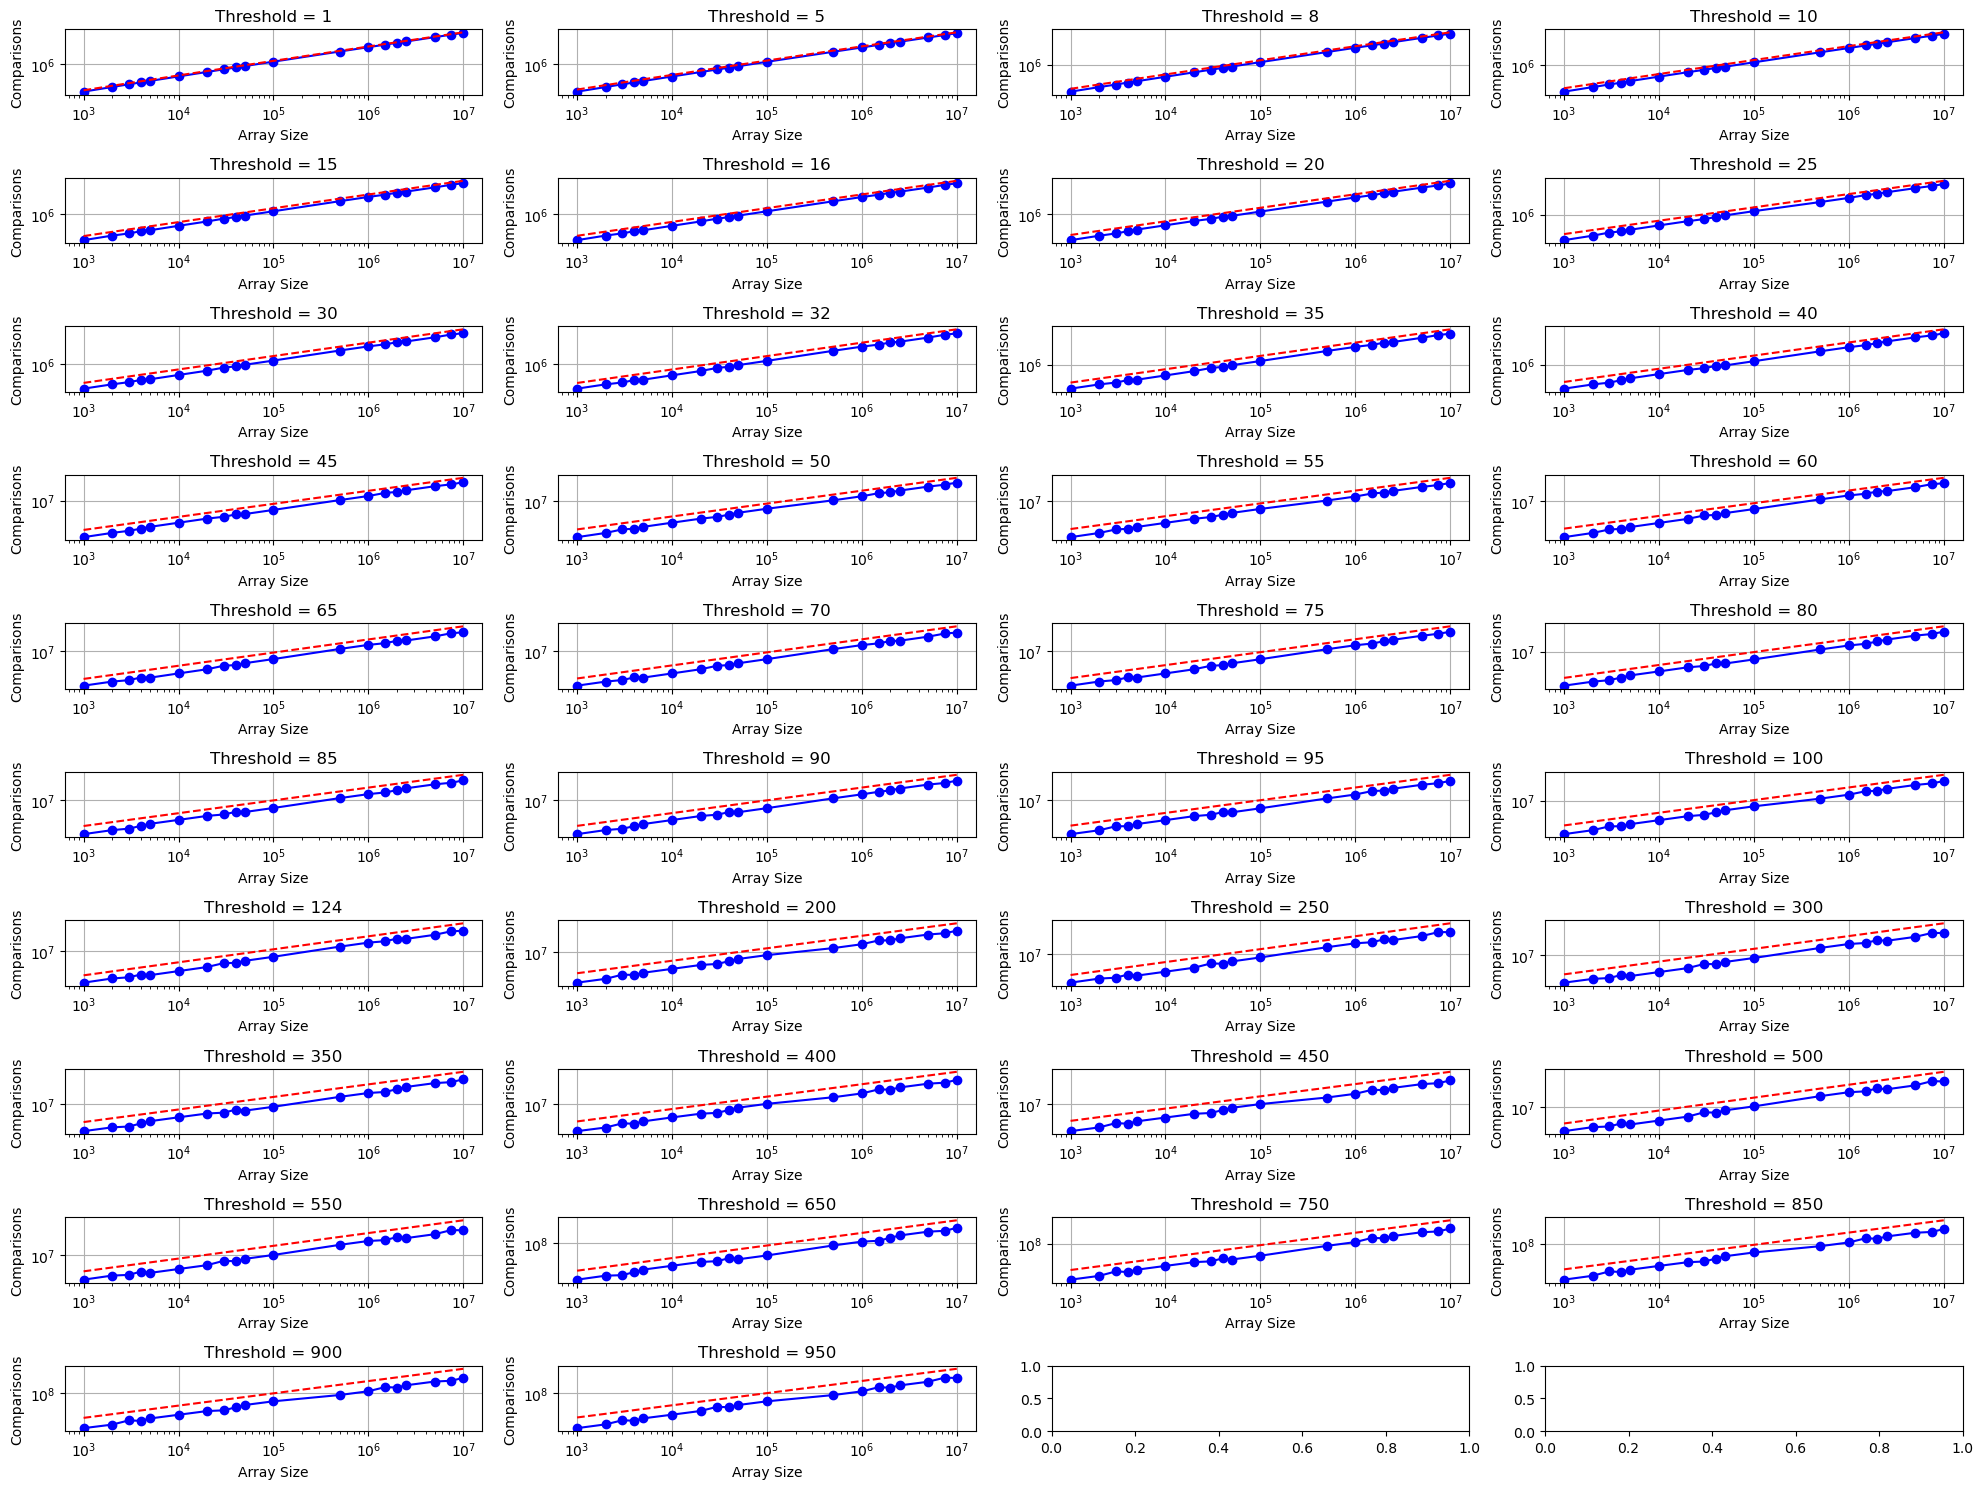

In [16]:
n = hybrid_df['Array Size'].unique()

fig, axes = plt.subplots(10, 4, figsize=(40, 30)) 
axes = axes.flatten()

unique_thresholds = hybrid_df['Threshold'].unique()
for i, Threshold in enumerate(unique_thresholds):
    df_threshold = hybrid_df[hybrid_df['Threshold'] == Threshold]
    k = Threshold
    theoretical_values = n*k + n*np.log2(n/k)
    
    axes[i].plot(df_threshold['Array Size'], df_threshold['Comparisons'], marker='o', linestyle='-', color='b')
    axes[i].plot(n, theoretical_values, label="Theoretical", linestyle="--", color="red")

    axes[i].set_title(f'Threshold = {Threshold}')
    axes[i].set_xlabel('Array Size')
    axes[i].set_ylabel('Comparisons')
    axes[i].grid(True)
    axes[i].set_xscale('log')  # Logarithmic scale for array size
    axes[i].set_yscale('log')  # Logarithmic scale for key comparisons

plt.tight_layout()
plt.show()

## cii. (Fixed Array Size) Key Comparisons vs Threshold

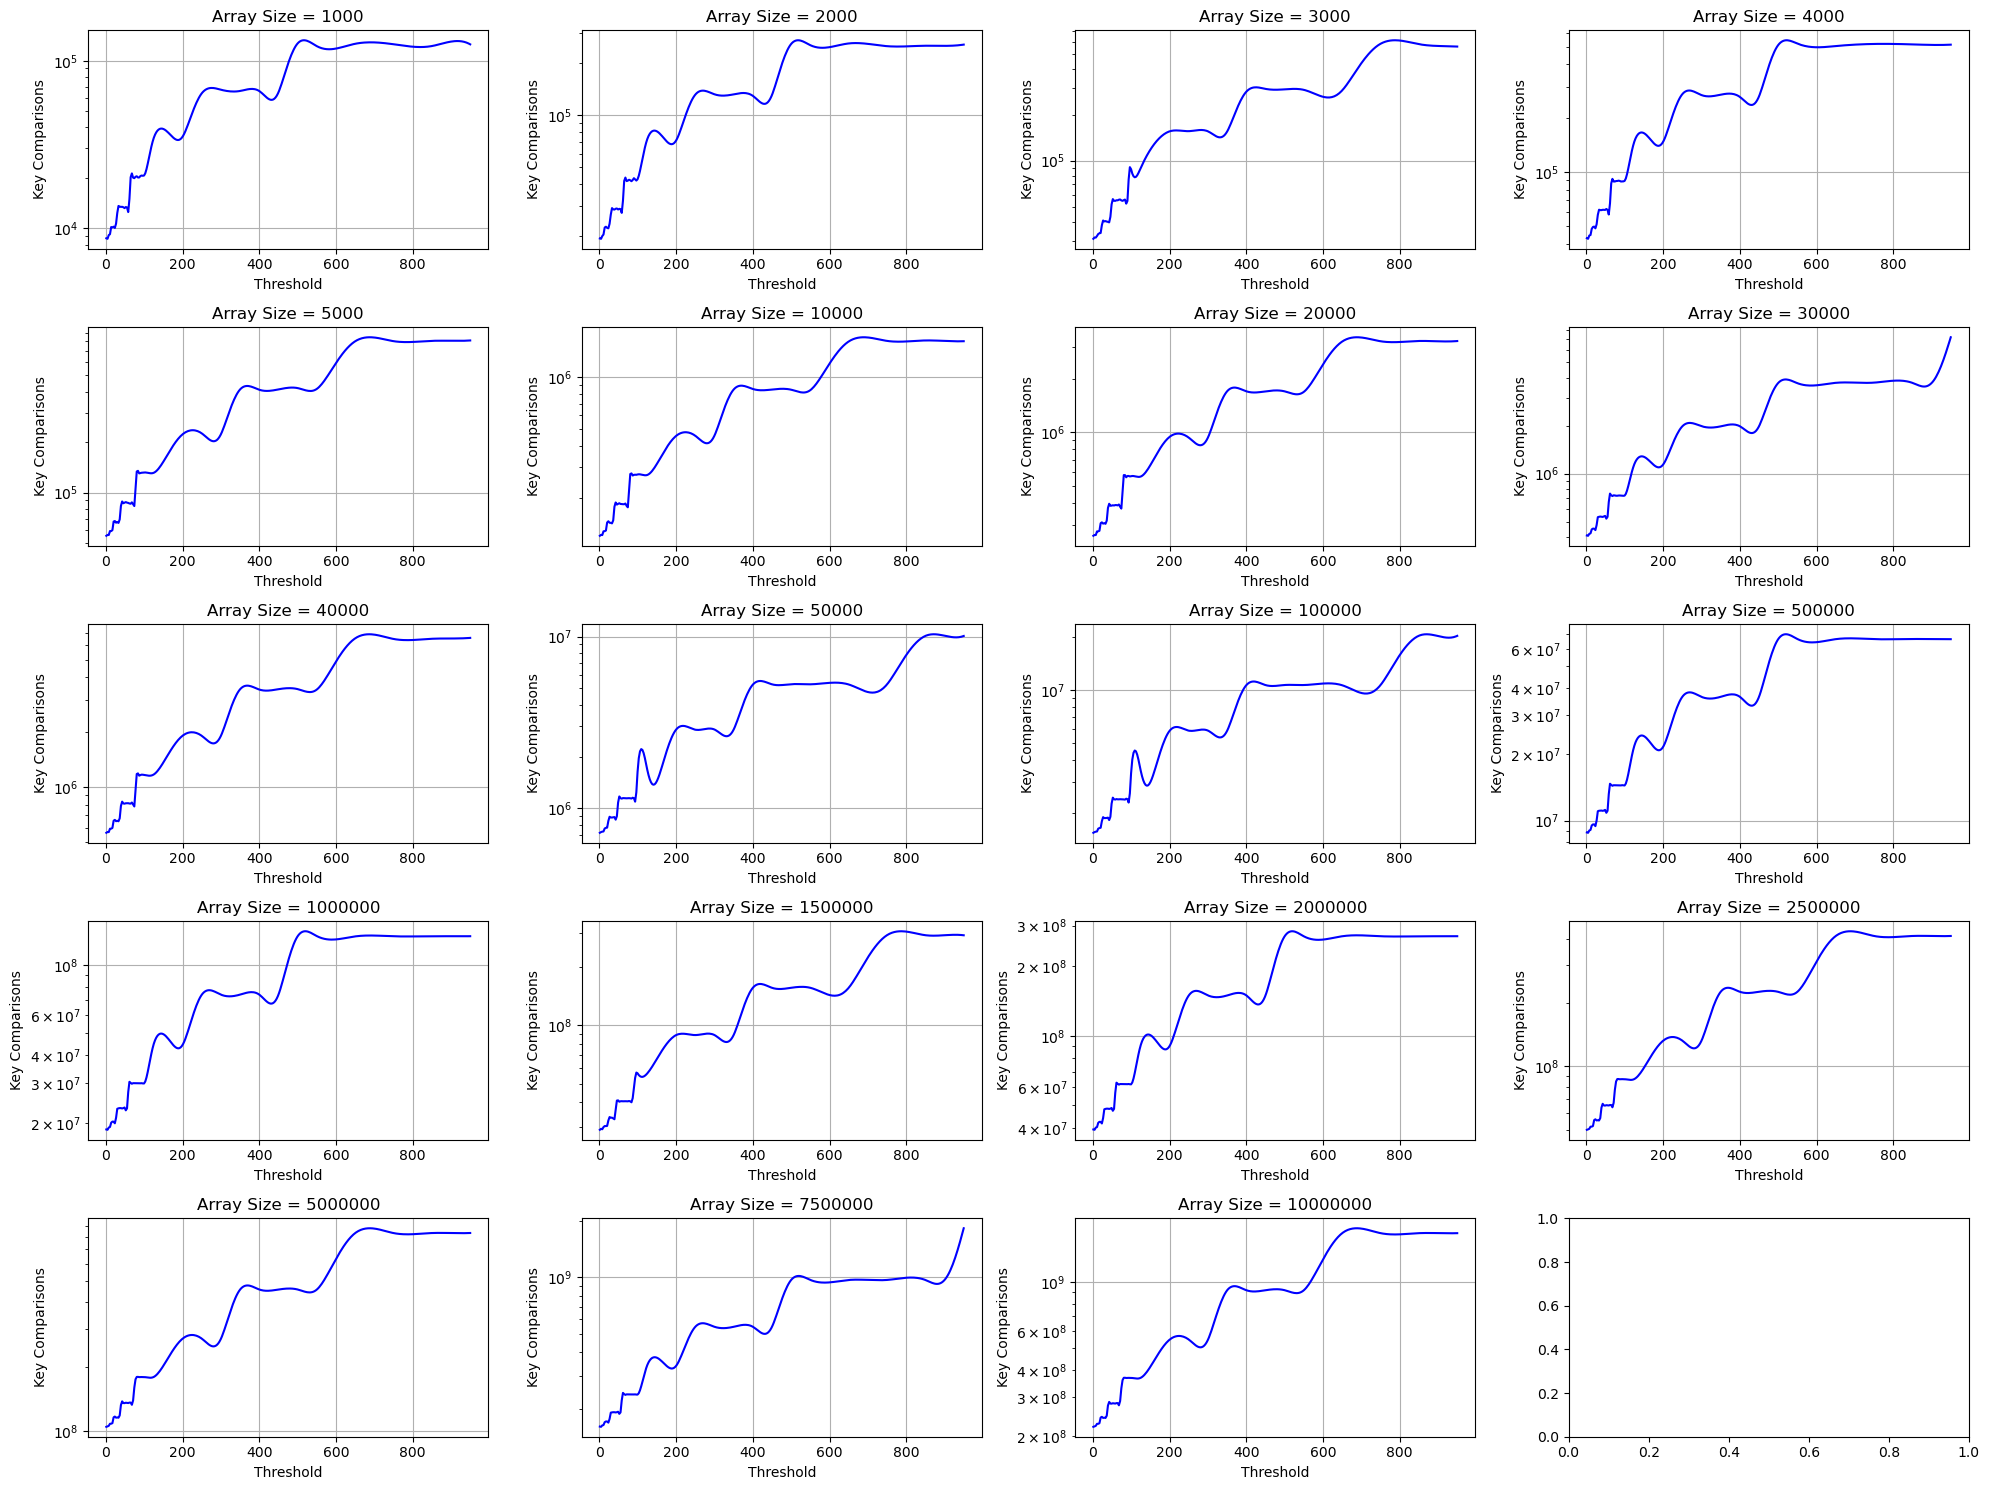

In [17]:
unique_array_sizes = hybrid_df['Array Size'].unique()

num_plots = len(unique_array_sizes)
fig, axes = plt.subplots((num_plots + 3) // 4, 4, figsize=(20, 15))
axes = axes.flatten()

for i, array_size in enumerate(unique_array_sizes):
    df_size = hybrid_df[hybrid_df['Array Size'] == array_size]
    
    # Plot the smoothed Key Comparisons vs Threshold on the corresponding subplot
    x_new = np.linspace(df_size['Threshold'].min(), df_size['Threshold'].max(), 300)
    spl = make_interp_spline(df_size['Threshold'], df_size['Comparisons'], k=3)  # k=3 for cubic spline
    y_smooth = spl(x_new)
    axes[i].plot(x_new, y_smooth, marker='', linestyle='-', color='b')
    
    # Plot Key Comparisons vs Threshold on the corresponding subplot
    #axes[i].plot(df_size['Threshold'], df_size['Comparisons'], marker='o', linestyle='-', color='b')
    
    # Customize each subplot
    axes[i].set_title(f'Array Size = {array_size}')
    axes[i].set_xlabel('Threshold')
    axes[i].set_ylabel('Key Comparisons')
    axes[i].grid(True)
    axes[i].set_yscale('log')  # Logarithmic scale for key comparisons if necessary

# Adjust layout so that titles and labels don't overlap
plt.tight_layout()

plt.show()

## ciii. (Fixed Array Size) Time Complexity vs Threshold

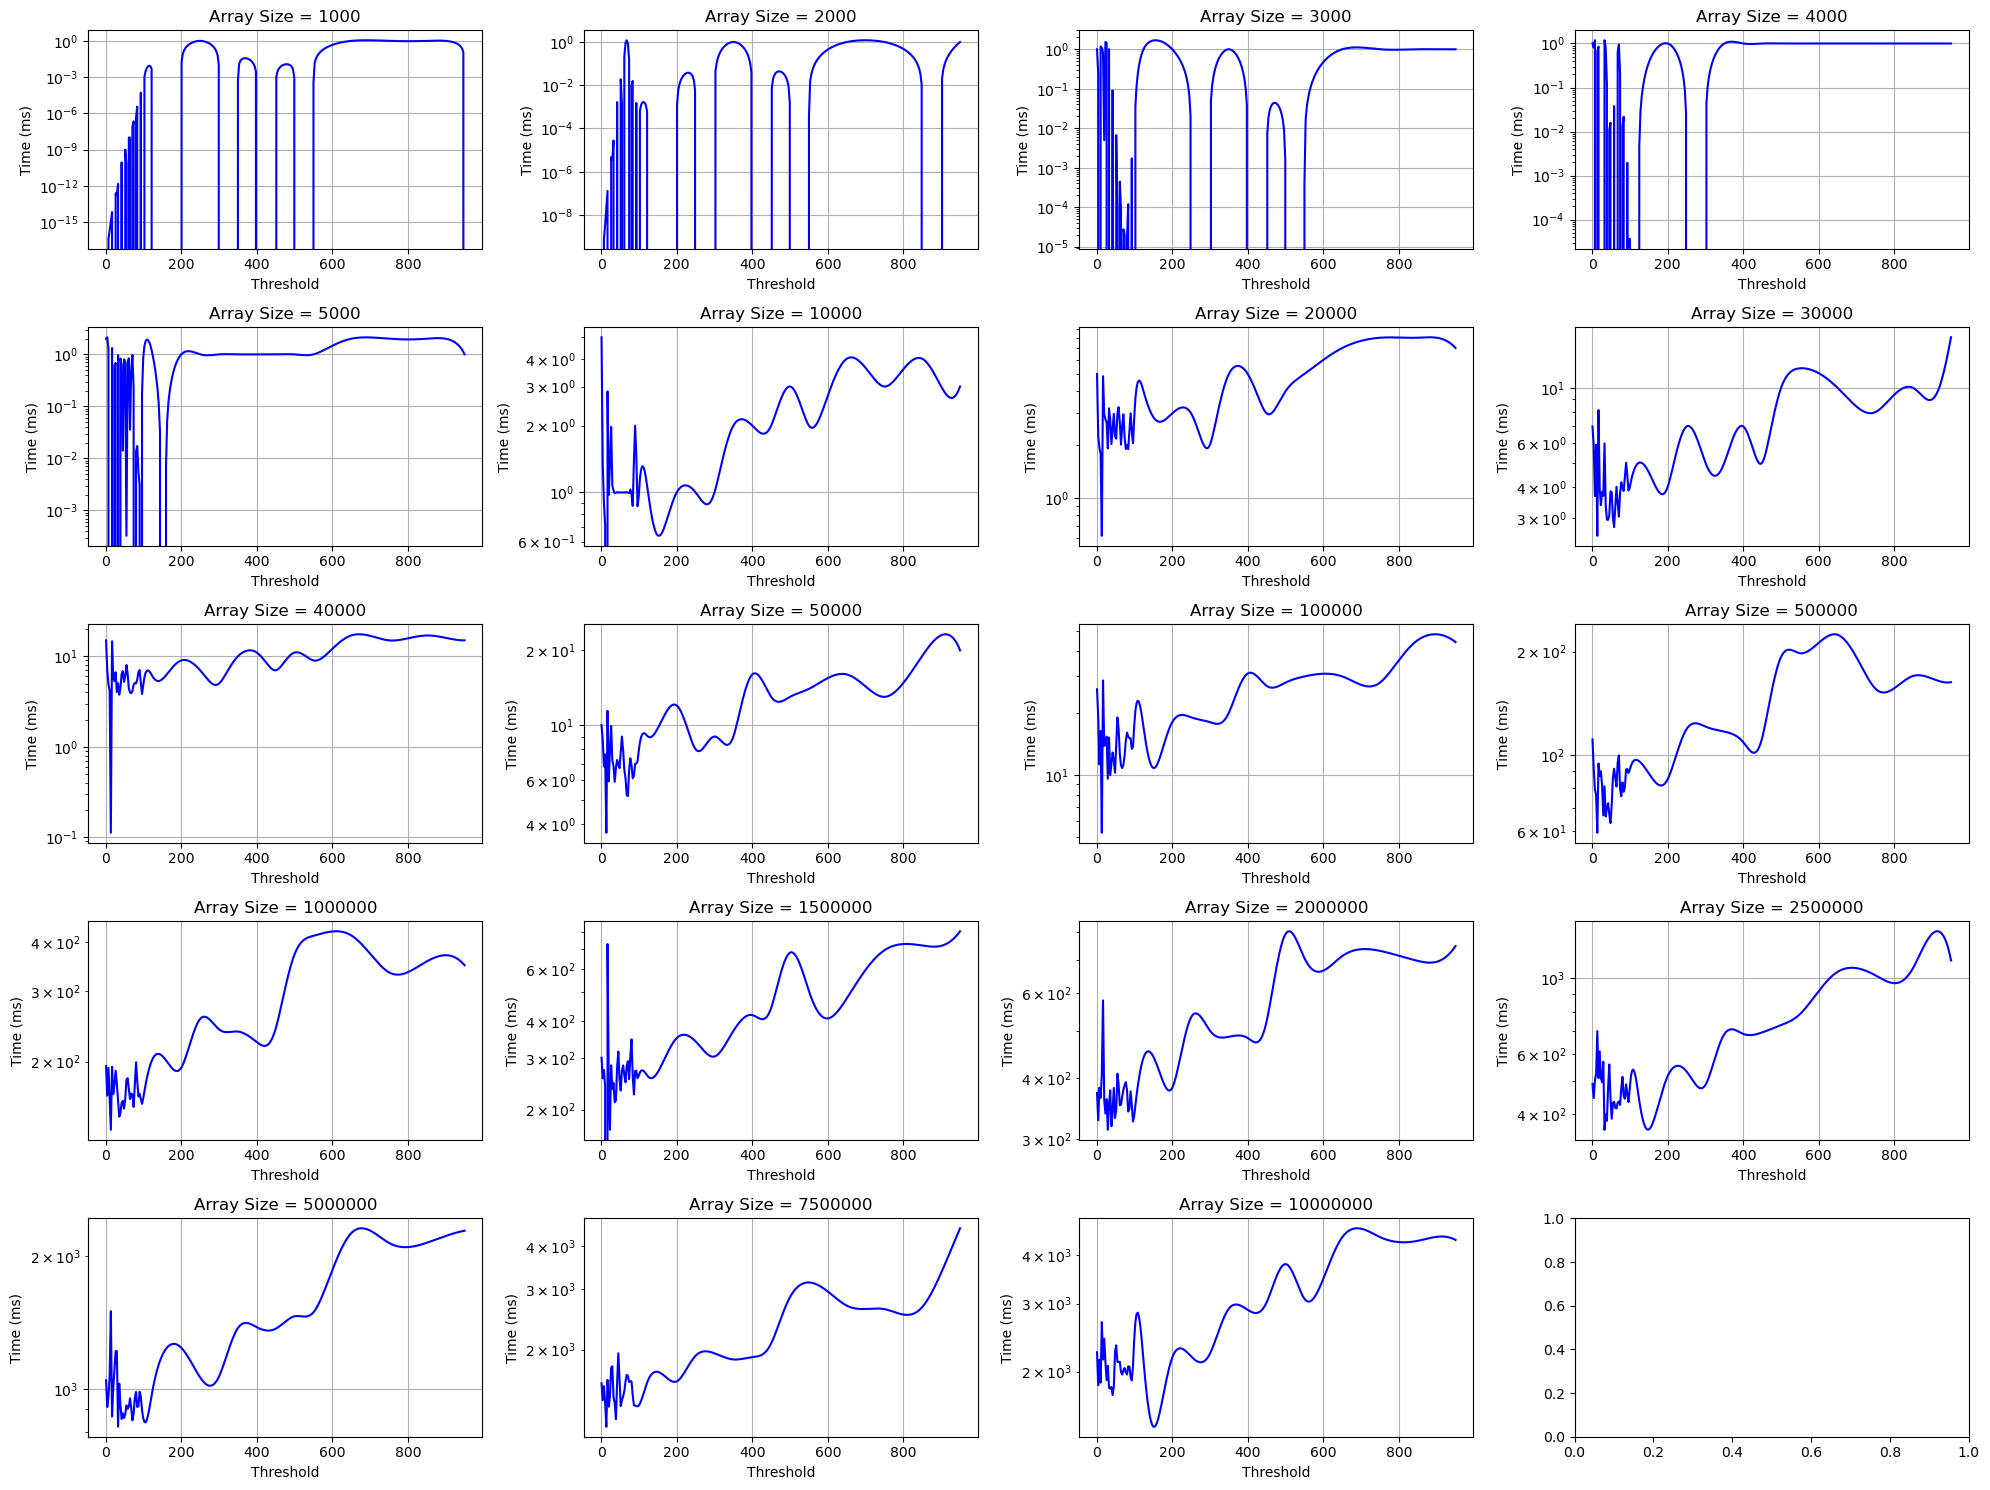

In [18]:
num_plots = len(unique_array_sizes)
fig, axes = plt.subplots((num_plots + 3) // 4, 4, figsize=(20, 15))
axes = axes.flatten()

for i, array_size in enumerate(unique_array_sizes):
    df_size = hybrid_df[hybrid_df['Array Size'] == array_size]
    
    # Plot the smoothed Key Comparisons vs Threshold on the corresponding subplot
    x_new = np.linspace(df_size['Threshold'].min(), df_size['Threshold'].max(), 300)
    spl = make_interp_spline(df_size['Threshold'], df_size['Time (ms)'], k=3)  # k=3 for cubic spline
    y_smooth = spl(x_new)
    axes[i].plot(x_new, y_smooth, marker='', linestyle='-', color='b')
    
    # Plot Time vs Threshold on the corresponding subplot
    #axes[i].plot(df_size['Threshold'], df_size['Time (ms)'], marker='o', linestyle='-', color='b')
    
    # Customize each subplot
    axes[i].set_title(f'Array Size = {array_size}')
    axes[i].set_xlabel('Threshold')
    axes[i].set_ylabel('Time (ms)')
    axes[i].grid(True)
    axes[i].set_yscale('log') 

plt.tight_layout()

plt.show()

## 4. Compare with original MergeSort
Implement the original version of Mergesort (as learnt in lecture). Compare its performance against the above
hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with <b>10 million integers</b>.

150    220100452
Name: Comparisons, dtype: int64 Series([], Name: Comparisons, dtype: int64)


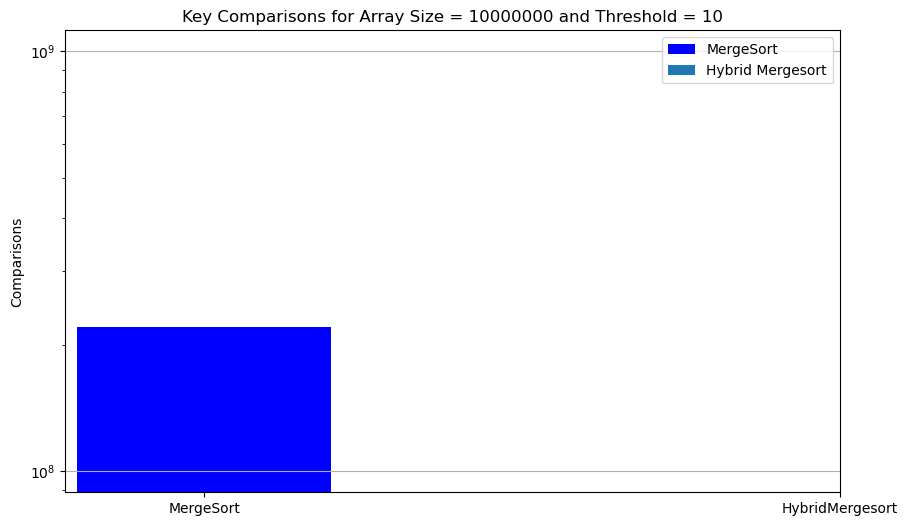

In [35]:
fixed_array_size = 10000000
fixed_threshold = 10
df_filtered = df[(df['Array Size'] == fixed_array_size) & (df['Threshold'] == fixed_threshold)]

#Separate the data for MergeSort and HybridMergeSort
df_mergesort = df_filtered[df_filtered['Algorithm'] == 'MergeSort']
df_hybrid_mergesort = df_filtered[df_filtered['Algorithm'] == 'HybridMergesort']

#Bar chart for Key Comparisons
plt.figure(figsize=(10, 6))

# Create bar positions
bar_width = 0.4
bar_positions = [0, 1]

# Bar heights (Key Comparisons)
mergesort_key_comparisons = df_mergesort['Comparisons']
hybrid_mergesort_key_comparisons = df_hybrid_mergesort['Comparisons']
print(df_mergesort['Comparisons'],df_hybrid_mergesort['Comparisons'])

# Plot bar chart for Key Comparisons
plt.bar(bar_positions[0], mergesort_key_comparisons, width=bar_width, label='MergeSort', color='b')
plt.bar(bar_positions[1], hybrid_mergesort_key_comparisons, width=bar_width, label='Hybrid Mergesort', color='r')

# Customize the plot for Key Comparisons
plt.xticks(bar_positions, ['MergeSort', 'HybridMergesort'])
plt.title(f'Key Comparisons for Array Size = {fixed_array_size} and Threshold = {fixed_threshold}')
plt.ylabel('Comparisons')
plt.grid(True, axis='y')
plt.legend()

plt.yscale('log')

plt.show()


# 下面的没有用到but我放着as a reference先 

## Key Comparisons
1. Emphirical vs Theoretical (for Hybrid Merge-Insertion Sort)
2. Hybrid Merge-Insertion Sort vs Standard Merge Sort

In [ ]:
'''
n = hybrid_df["n"].unique()
k = threshold
theoretical_values = 

# line plot for Emphirical vs Theoretical
f, ax = plt.subplots(1, 2, figsize=(15, 5))

sb.lineplot(data=hybrid_df, y="compareCount", x="n", ax=ax[0], label="Emphirical")
ax[0].set_title("Empirical vs Theoretical") 

# Plot the theoretical analysis curve
ax[0].plot(
    n_values, theoretical_values, label="Theoretical", linestyle="--", color="red"
)
ax[0].legend() 


# line plot for Hybrid vs Standard Merge Sort
sb.lineplot(data=hybrid_df, y="compareCount", x="n", ax=ax[1], label="Hybrid Merge Sort", color="blue")
sb.lineplot(data=standard_merge_df, y="compareCount", x="n", ax=ax[0], label="Standard Merge Sort", color="red")
ax[1].set_title("Hybrid vs Standard")  

# Set x-axis limits to show from 0 to 50,000,000
x_min = 0
x_max = 50_000_000  # Use underscores for readability

ax[0].set_xlim(x_min, x_max)
ax[1].set_xlim(x_min, x_max)

# tight layout to prevent overlapping
plt.tight_layout()

plt.show()
'''

## Run Time
1. Hybrid Merge-Insertion Sort (Emphirical)
2. Hybrid Merge-Insertion Sort vs Standard Merge Sort

In [ ]:
'''
# line plot for key comparison
f, ax = plt.subplots(1, 2, figsize=(15, 5))

sb.lineplot(data=hybrid_df,y="time",x="n",ax=ax[0], label="Emphirical")
ax[0].set_title("Hybrid (Emphirical)")  # set title for first subplot
ax[0].legend()  # Add a legend to the plot

# line plot for time
sb.lineplot(data=hybrid_df,y="time",x="n",ax=ax[1], label="Emphirical", color="blue")
sb.lineplot(data=standard_merge_df,y="time",x="n",ax=ax[1], label="Emphirical", color="red")
ax[1].set_title("Hybrid vs Standard")  # set title for second subplot

# Set x-axis limits to show from 0 to 50,000,000
x_min = 0
x_max = 50_000_000  # Use underscores for readability

ax[0].set_xlim(x_min, x_max)
ax[1].set_xlim(x_min, x_max)

# tight layout to prevent overlapping
plt.tight_layout()

plt.show()
'''